In [1]:
#importing all important packages
import numpy as np #linear algebra
import pandas as pd #data processing
import matplotlib.pyplot as plt #data visualisation
import seaborn as sns #data visualisation
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler

### Loading Dataset

In [2]:
dfframing=pd.read_csv("framingham.csv")
print("File read Successfully")

File read Successfully


### Printing Head and Tail

In [3]:
dfframing.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
dfframing.tail()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0


<b>Data Information</b>

In [5]:
dfframing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


<b><u>Description of Info</b></u>

1. This DataFrame contains 4,238 records and 16 columns related to patient health data.
2. It includes both integer and float attributes such as age, blood pressure, cholesterol, BMI, and glucose levels.
3. The target variable ‘TenYearCHD’ indicates whether a person is likely to develop coronary heart disease within 10 years.

### Finding Unique Values

In [6]:
dfframing.nunique()

male                  2
age                  39
education             4
currentSmoker         2
cigsPerDay           33
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             248
sysBP               234
diaBP               146
BMI                1363
heartRate            73
glucose             143
TenYearCHD            2
dtype: int64

<b><u>Description of nunique</b></u>

1. This output shows the **number of unique values** in each column of the dataset.
2. Most variables are binary (e.g., male, diabetes), while others like BMI, glucose, and cholesterol have many distinct continuous values.

In [7]:
# Drop rows with missing values
dfframing = dfframing.dropna()

In [8]:
dfframing.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

### Data Distribution

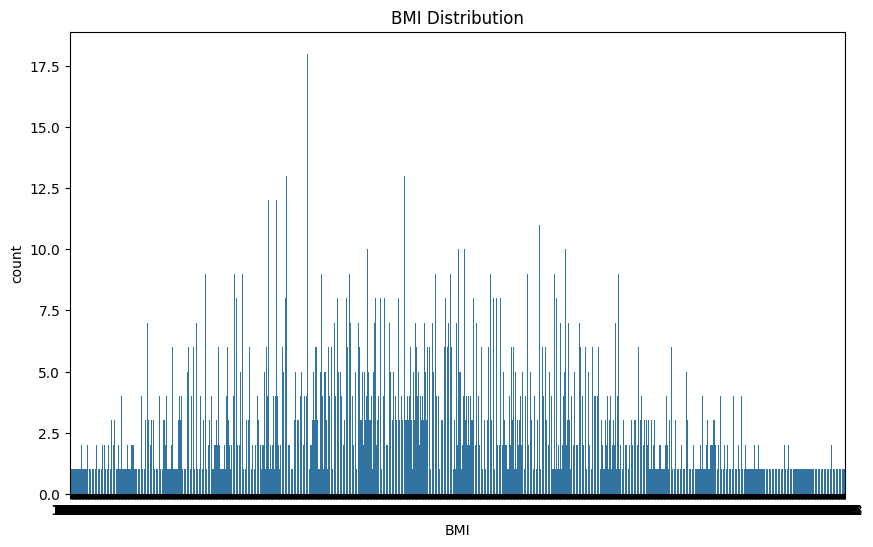

In [9]:
plt.figure(figsize=(10,6))
sns.countplot(x=dfframing['BMI'])
plt.title("BMI Distribution")
plt.show()

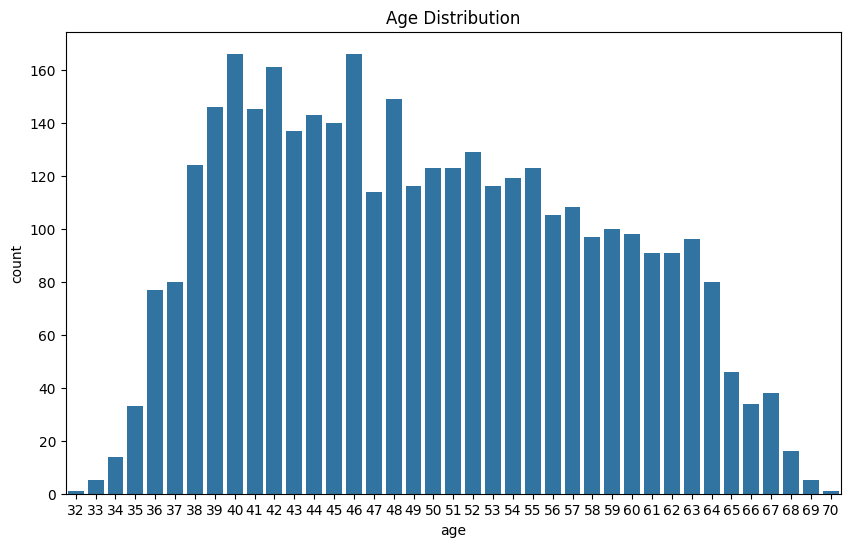

In [10]:
plt.figure(figsize=(10,6))
sns.countplot(x=dfframing['age'])
plt.title("Age Distribution")
plt.show()

## Correlation Matrix

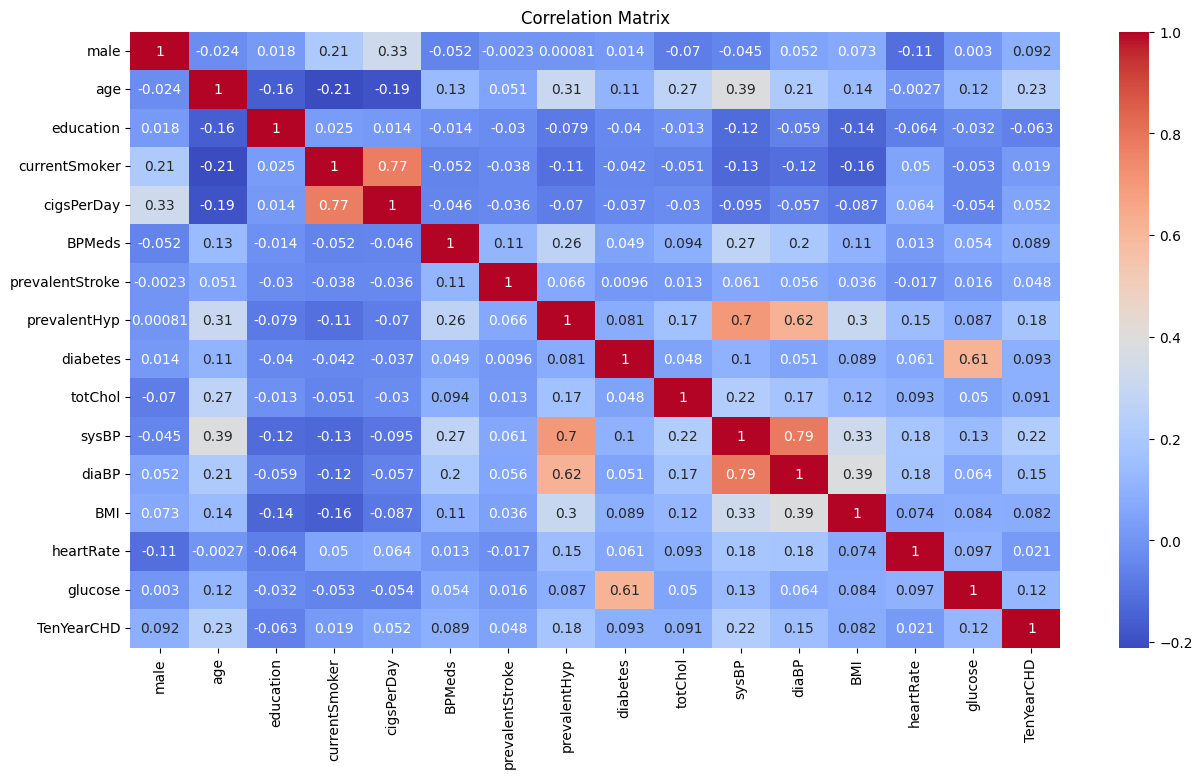

In [11]:
plt.figure(figsize=(15,8))
sns.heatmap(dfframing.corr(),annot=True,cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

<b><u>Selecting input output columns(Feature Selection)</b></u>

In [20]:
# Separate features and target
x = dfframing.drop(['TenYearCHD'], axis=1)  # Make sure 'glucose' is included here
y = dfframing['TenYearCHD']

### Data Validation

In [21]:
xTrain, xTest,yTrain, yTest=train_test_split(x,y,test_size=0.3,random_state=42)

In [22]:
yTrain.value_counts()

TenYearCHD
0    2176
1     383
Name: count, dtype: int64

### Training Logistic Regression Model

In [23]:
model=LogisticRegression() #Model Loading

In [24]:
model.fit(xTrain,yTrain) #sending training data

C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [25]:
#prediction with testing data
y_pred=model.predict(xTest)

In [26]:
# Confusion Matrix
print("Confusion matrix-\n",confusion_matrix(yTest,y_pred))

#Classification Report
print("Classification Report-\n",classification_report(yTest,y_pred))

# Accuracy Score
print("Accuracy of model-\n",accuracy_score(yTest,y_pred))

Confusion matrix-
 [[917   6]
 [168   6]]
Classification Report-
               precision    recall  f1-score   support

           0       0.85      0.99      0.91       923
           1       0.50      0.03      0.06       174

    accuracy                           0.84      1097
   macro avg       0.67      0.51      0.49      1097
weighted avg       0.79      0.84      0.78      1097

Accuracy of model-
 0.8413855970829535


### User Input Prediction

In [42]:
def predict_framing():

    # Collect inputs
    male = int(input("Male: "))
    age = float(input("Enter Age: "))
    education = int(input("Enter Education Level (1–4): "))
    currentSmoker = int(input("Current Smoker: "))
    cigsPerDay = float(input("Cigarettes per day: "))
    BPMeds = int(input("On BP meditation "))
    prevalentStroke = int(input("Enter prevalentStroke: "))
    prevalentHyp = int(input("Enter prevalentHyp: "))
    diabetes = int(input("Enter diabetes: "))
    totChol = float(input("Total Cholesterol: "))
    sysBP = float(input("Systolic BP: "))
    diaBP = float(input("Diastolic BP: "))
    BMI = float(input("BMI: "))
    heartRate = float(input("Heart Rate: "))
    glucose = float(input("Glucose Level: "))

    # Create a dataframe with feature names
    user_data = pd.DataFrame([[
        male, age, education, currentSmoker, cigsPerDay, BPMeds,
        prevalentStroke, prevalentHyp, diabetes, totChol,
        sysBP, diaBP, BMI, heartRate, glucose
    ]], columns=['male', 'age', 'education', 'currentSmoker', 'cigsPerDay',
                 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes',
                 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose'])

    # Prediction + probability
    prediction = model.predict(user_data)
    probability = model.predict_proba(user_data)[0][1]  # Probability of class 1 (disease)

    if prediction[0] == 1:
        print(f" High chance of Heart Disease ({probability*100:.2f}% risk)")
    else:
        print(f" Low chance of Heart Disease ({probability*100:.2f}% risk)")
predict_framing()

Male:  1
Enter Age:  39
Enter Education Level (1–4):  4
Current Smoker:  0
Cigarettes per day:  0
On BP meditation  0
Enter prevalentStroke:  0
Enter prevalentHyp:  0
Enter diabetes:  0
Total Cholesterol:  196
Systolic BP:  106
Diastolic BP:  70
BMI:  26.97
Heart Rate:  80
Glucose Level:  77


 Low chance of Heart Disease (2.88% risk)
